<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

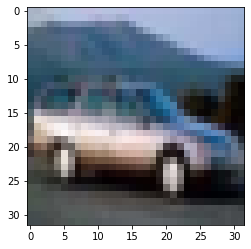

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [0]:
# MODIFY THE CODE TO ADD A VALIDATION SET
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=1/5, shuffle= True)

# train_images = train_images
# train_labels = train_labels

# train_images = train_images.reshape((50000, 32, 32, 3))
# train_images = train_images.astype('float32') / 255


x_train = x_train.reshape((40000, 32, 32, 3))
x_train = x_train.astype('float32') / 255

x_valid = x_valid.reshape((10000, 32, 32, 3))
x_valid = x_valid.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

# train_labels = to_categorical(train_labels)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
test_labels = to_categorical(test_labels)
# print(test_labels.shape)



In [6]:
  from keras.applications import VGG16

  conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))
  
  conv_base.summary()











Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)     

In [8]:
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='sigmoid'))

  
  opt = keras.optimizers.RMSprop(lr=0.1)

  model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 14,732,490
Trainable params: 14,732,490
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_hist = model.fit(x_train, y_train,
          epochs=5, batch_size=1024, validation_data=(x_valid, y_valid))
        

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 8s 204us/step - loss: 0.2337 - acc: 0.9223 - val_loss: 0.2290 - val_acc: 0.9218
Epoch 2/5
40000/40000 [==============================] - 8s 204us/step - loss: 0.2220 - acc: 0.9245 - val_loss: 0.2529 - val_acc: 0.9145
Epoch 3/5
40000/40000 [==============================] - 8s 204us/step - loss: 0.1949 - acc: 0.9347 - val_loss: 0.2079 - val_acc: 0.9299
Epoch 4/5
40000/40000 [==============================] - 8s 204us/step - loss: 0.1698 - acc: 0.9410 - val_loss: 0.1775 - val_acc: 0.9345
Epoch 5/5
40000/40000 [==============================] - 8s 204us/step - loss: 0.1572 - acc: 0.9449 - val_loss: 0.1879 - val_acc: 0.9329


In [28]:
model_hist = model.fit(x_train, y_train,
          epochs=1, batch_size=1024, validation_data=(x_valid, y_valid))

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 8s 204us/step - loss: 0.1326 - acc: 0.9517 - val_loss: 0.1745 - val_acc: 0.9398


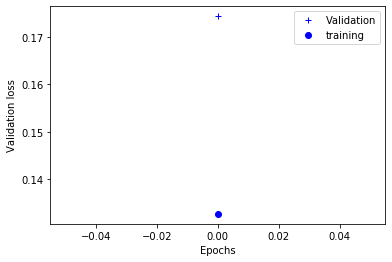

In [29]:
import matplotlib.pyplot as plt

# epochs = range(0, 20)
n_epochs = len(model_hist.history['loss'])
epochs = range(0, n_epochs)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [30]:
print(np.shape(test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

(10000, 10)
10000/10000 [==============================] - 2s 216us/step
test_acc: 0.9392699922561646


0.1740997994661331

In [0]:
from google.colab import files
filename = './pre-trained-CIFAR3.h5'
model.save_weights(filename, overwrite=True)


In [0]:
files.download(filename) 